In [ ]:
from torch import nn
import torch.nn.functional as F
import numpy as np
import torchvision
import torchvision.models as models
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.transforms.functional import crop
import cv2
import matplotlib.pyplot as plt
import time
import torch
from torch.nn import *

In [ ]:
def crop_r(image):
    return crop(image, 4, 124, 124, 124)
    
def crop_l(image):
    return crop(image, 4, 4, 124, 124)  
    
transform_right = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_r),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])
transform_left = transforms.Compose(
    [
        transforms.Resize((256,256)),
        #transforms.RandomRotation(10),
        transforms.Lambda(crop_l),
        transforms.ToTensor(),
        transforms.Normalize((0.36, 0.36, 0.36), (0.28, 0.28, 0.28))
    ])

In [ ]:
train_path = '/content/drive/MyDrive/Datasets/TUM'
batch_size = 1

train_r = datasets.ImageFolder(train_path, transform_right)
train_l = datasets.ImageFolder(train_path, transform_left)

train_loader_r = torch.utils.data.DataLoader(train_r, batch_size)
train_loader_l = torch.utils.data.DataLoader(train_l, batch_size)


In [ ]:
model = models.vgg16(pretrained=True)
layer = 0
for c in model.children():
  layer += 1
  if layer < 3:
    for param in c.parameters():
      param.requires_grad = False

model_weights =[]
conv_layers = []
model_children = list(model.children())
counter = 0
cl = [0,2,5,7,10,12,14,17,19,21,24,26,28]
for i in range(len(model_children)):
    if type(model_children[i]) == nn.modules.container.Sequential:
        print('ok')
        for j in range(len(model_children[i])):
            
            if type(model_children[i][j]) == Conv2d:
                print(model_children[i][j])
                counter+=1
                model_weights.append(model_children[i][j].weight)
                conv_layers.append(model_children[i][j])
print(f"Total convolution layers: {counter}")
print("conv_layers")

top1 = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(inplace=True),
    nn.Dropout(p=0.5, inplace=False),
    nn.Linear(in_features=4096, out_features=1000, bias=True)
)

top2 = nn.Sequential(
    nn.Linear(in_features=4096, out_features=256, bias=True),
    nn.ReLU(),
    nn.Dropout(p=0.4),
    nn.Linear(in_features=256, out_features=2, bias=True),
)

model.classifier = top1
model.classifier[6] = top2
model

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

ok
Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
ok
Total convolution layers: 13
conv_layers


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
PATH = '/content/drive/MyDrive/office_gazebo_v7/model.pt'
#model = LoopClosure()
model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [ ]:
def rightpt(train_loader_r, min_, max_, aux_):
  for i, data in enumerate(train_loader_r):
    if i > min_:
      inputs, labels = data
      output1 = model.features[4](model.features[3](model.features[2](model.features[1](model.features[0](inputs)))))
      output2 = model.features[9](model.features[8](model.features[7](model.features[6](model.features[5](output1)))))
      output3 = model.features[12](model.features[11](model.features[10](output2)))
      output4 = model.features[17](model.features[16](model.features[15](model.features[14](model.features[13](output3)))))
      output5 = model.features[22](model.features[21](model.features[20](model.features[19](model.features[18](output4)))))
      output6 = model.features[30](model.features[29](model.features[28](model.features[27](model.features[26](model.features[25](model.features[24](model.features[23](output5))))))))
      output7 = torch.flatten(model.avgpool(output6),1)
      output8 = model.classifier[6][0](model.classifier[5](model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output7)))))))
      output_.append(output8)
      if i > max_:
        return output_


In [ ]:
def leftpt(train_loader_l, min_, max_, aux_,output_):
  for i,data in enumerate(train_loader_l):
    if i > min_:
      inputs, labels = data
      output1 = model.features[4](model.features[3](model.features[2](model.features[1](model.features[0](inputs)))))
      output2 = model.features[9](model.features[8](model.features[7](model.features[6](model.features[5](output1)))))
      output3 = model.features[12](model.features[11](model.features[10](output2)))
      output4 = model.features[17](model.features[16](model.features[15](model.features[14](model.features[13](output3)))))
      output5 = model.features[22](model.features[21](model.features[20](model.features[19](model.features[18](output4)))))
      output6 = model.features[30](model.features[29](model.features[28](model.features[27](model.features[26](model.features[25](model.features[24](model.features[23](output5))))))))
      output7 = torch.flatten(model.avgpool(output6),1)
      output8 = model.classifier[6][0](model.classifier[5](model.classifier[4](model.classifier[3](model.classifier[2](model.classifier[1](model.classifier[0](output7)))))))
      output_[i-aux_] = torch.cat((output_[i-aux_], output8), 1)
      if i > max_:
          return output_
           

In [ ]:
for n_it in range(1,44):
  output_ = []
  output_new = []
  try:
    if n_it == 1:
      min_ = 0
    else:
      min_ = (n_it-1)*200
    max_ = n_it*200
    aux_ = min_ +1
    output_ = rightpt(train_loader_r, min_, max_, aux_)
    output_new = leftpt(train_loader_l, min_, max_, aux_, output_)
    out_path = '/content/drive/MyDrive/Datasets/tensors_tum_vgg16_1/tensors'+str(n_it)+'.pt'
    torch.save(output_new,out_path)
  except:
    print('error')


error


In [ ]:
def match(cam_img, db_img, dist_limit):
    distance = torch.cdist(cam_img, db_img, p=2)
    max_dist = torch.max(distance)
    min_dist = dist_limit*2/3
    if (min_dist < max_dist) and (max_dist <= dist_limit):
        return True
    return False

In [ ]:
def belief_generation(db, descriptor):
    belief = []
    lp = 0
    for d in db:
        belg = match(descriptor, d, 9)
        if belg:
            belief.append(1)
        else:
            belief = []

        if len(belief) >= 3:
            print('loop')
            print(d)
            lp += 1
    return lp

In [ ]:
database = [database1,database2,database3,database4,database5,database6,database7,database8,database9,database10,
            database11,database12,database13,database14,database15,database16,database17,database18,database19,database20,
            database21,database22,database23,database24,database25,database26,database27,database28,database29,database30,
            database31,database32,database33,database34,database35,database36,database37,database38,database39,database40,
            database41]
        
d = []

In [ ]:
co = 0
for bg in database:
  for i,data in enumerate(bg):
    if i < 3 and co == 0:
      d.append(data)
    else:
      loop_ = belief_generation(d, data)
      if loop_ > 1:
        with open('/content/drive/MyDrive/Datasets/TUM_/loop_tum_vgg16_v3.txt', 'a') as txt_file:
          txt_file.write('\n Found loop')
          image_number = (co*200)+i
          txt_file.write('\n image: '+str(image_number))
      else:
        d.append(data)
  co += 1
  


A saída de streaming foi truncada nas últimas 5000 linhas.
         -3.6015e-02, -7.3765e-01, -2.8999e-01, -6.3658e-03, -3.9369e-01,
         -1.0827e-01, -3.7946e-01, -4.3320e-01, -2.7577e-01, -8.1961e-01,
          3.3401e-01, -2.5511e-01, -1.3475e+00,  1.6695e-01, -4.7999e-01,
         -3.9181e-01, -3.1570e-01,  1.2666e-01, -1.7122e-01, -6.4088e-01,
         -4.1957e-02,  8.1457e-02,  1.6542e-02, -3.2896e-01, -7.8017e-01,
         -1.3643e-01, -8.9967e-01, -7.5057e-01,  9.3021e-01, -5.8329e-01,
         -2.9563e-01,  8.6991e-02,  1.4922e-01, -3.5827e-01,  1.2536e-02,
         -3.8037e-01, -1.5581e+00, -4.5108e-01, -4.7734e-01, -4.4069e-01,
          2.4136e-01, -2.3353e-01, -6.7642e-02, -4.7956e-01, -3.0893e-01,
          9.3323e-01, -1.8133e-01,  1.8311e-01, -6.8840e-01, -6.4999e-01,
          7.2192e-02, -9.3586e-01, -6.6971e-01, -4.5092e-02, -1.0045e-01,
         -2.0079e-01,  2.8159e-01, -6.2154e-01, -4.4524e-02, -3.3260e-01,
         -9.0588e-01,  1.5279e-01,  9.8808e-01, -4.08

KeyboardInterrupt: ignored

In [ ]:
c = 0
for d in database1:
    distance = torch.cdist(d, database1[150], p=2)
    max_dist = torch.max(distance)
    print('image: {}, distance: {}'.format(c, max_dist))
    c += 1

image: 0, distance: 14.30656623840332
image: 1, distance: 13.749798774719238
image: 2, distance: 11.282587051391602
image: 3, distance: 13.787059783935547
image: 4, distance: 16.159748077392578
image: 5, distance: 16.196775436401367
image: 6, distance: 10.709968566894531
image: 7, distance: 12.211099624633789
image: 8, distance: 12.072775840759277
image: 9, distance: 11.899861335754395
image: 10, distance: 9.008231163024902
image: 11, distance: 7.387841701507568
image: 12, distance: 10.931077003479004
image: 13, distance: 9.14490795135498
image: 14, distance: 10.667984962463379
image: 15, distance: 11.649738311767578
image: 16, distance: 11.94933795928955
image: 17, distance: 19.315290451049805
image: 18, distance: 16.27291488647461
image: 19, distance: 9.190265655517578
image: 20, distance: 9.879611015319824
image: 21, distance: 10.697538375854492
image: 22, distance: 9.325358390808105
image: 23, distance: 9.098618507385254
image: 24, distance: 6.8120012283325195
image: 25, distance: 

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Datasets/metricas/tum_vgg16_adaptada_1.csv')


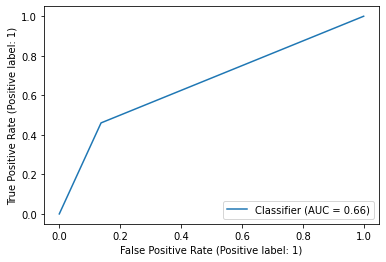

In [ ]:
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt


RocCurveDisplay.from_predictions(df['actual'], df['pred'])
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score


print('AUC: ',roc_auc_score(df['actual'], df['pred']))
print('Accuracy: ',accuracy_score(df['actual'], df['pred']))
print('f1: ',f1_score(df['actual'], df['pred']))


AUC:  0.6616251489854714
Accuracy:  0.8278313253012048
f1:  0.3172479694218825


In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(df['actual'], df['pred'])

array([[6539, 1040],
       [ 389,  332]])